# 1. EDA

### Cargar librerias


In [8]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Cargar datos y crear DF

In [2]:
df = pd.DataFrame(pd.read_csv('retail_sales_dataset.csv'))
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Identifiquemos las columnas

**Transaction ID:** Un identificador único para cada transacción, que permite el seguimiento y la referencia.

**Date:** La fecha en que ocurrió la transacción, proporcionando información sobre las tendencias de ventas a lo largo del tiempo.

**Customer ID:** Un identificador único para cada cliente, que permite un análisis centrado en el cliente.

**Gender:** El género del cliente (Masculino/Femenino), ofreciendo información sobre patrones de compra basados en el género.

**Age:** La edad del cliente, facilitando la segmentación y exploración de influencias relacionadas con la edad.

**Product Category:** La categoría del producto comprado (por ejemplo, Electrónica, Ropa, Belleza), ayudando a entender las preferencias de productos.

**Quantity:** El número de unidades del producto comprado, contribuyendo a información sobre volúmenes de compra.


### Verificación de valores inapropiados

In [3]:
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**Interpretación:**

De lo anterior vemos que no hay datos con valores inapropiados (negativos) o con algún valor que no parezca razonable, en la edad vemos que la edad minima es 18, así que todos los registros son de personas mayores de edad. Por ahora no hay valores que quisiera descartar.

### Análisis de valores nulos y tipos de datos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


No hay registros nulos y en cuanto a los tipos de datos todos están acorde a lo que representa a excepción de la fecha a la que le asignaremos un tipo de dato datetime

In [5]:
df = df.astype({'Date': 'datetime64[ms]'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ms]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ms](1), int64(5), object(3)
memory usage: 70.4+ KB


### Registros duplicados

In [6]:
df[df.duplicated(keep=False)]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


### Valores únicos

Vamos a analizar los valores únicos solo para las variables categóricas 'Gender' y 'Product Category'

In [7]:
cat_names = ['Gender', 'Product Category']
unique_values = {col: df[col].unique() for col in cat_names}

pprint(unique_values)

{'Gender': array(['Male', 'Female'], dtype=object),
 'Product Category': array(['Beauty', 'Clothing', 'Electronics'], dtype=object)}


Como vemos los posibles valores para cada categoría no presentan ninguna inconsistencia.

# 2. Exploración de datos con python

### Visualizaciones univariadas y multivariadas: 

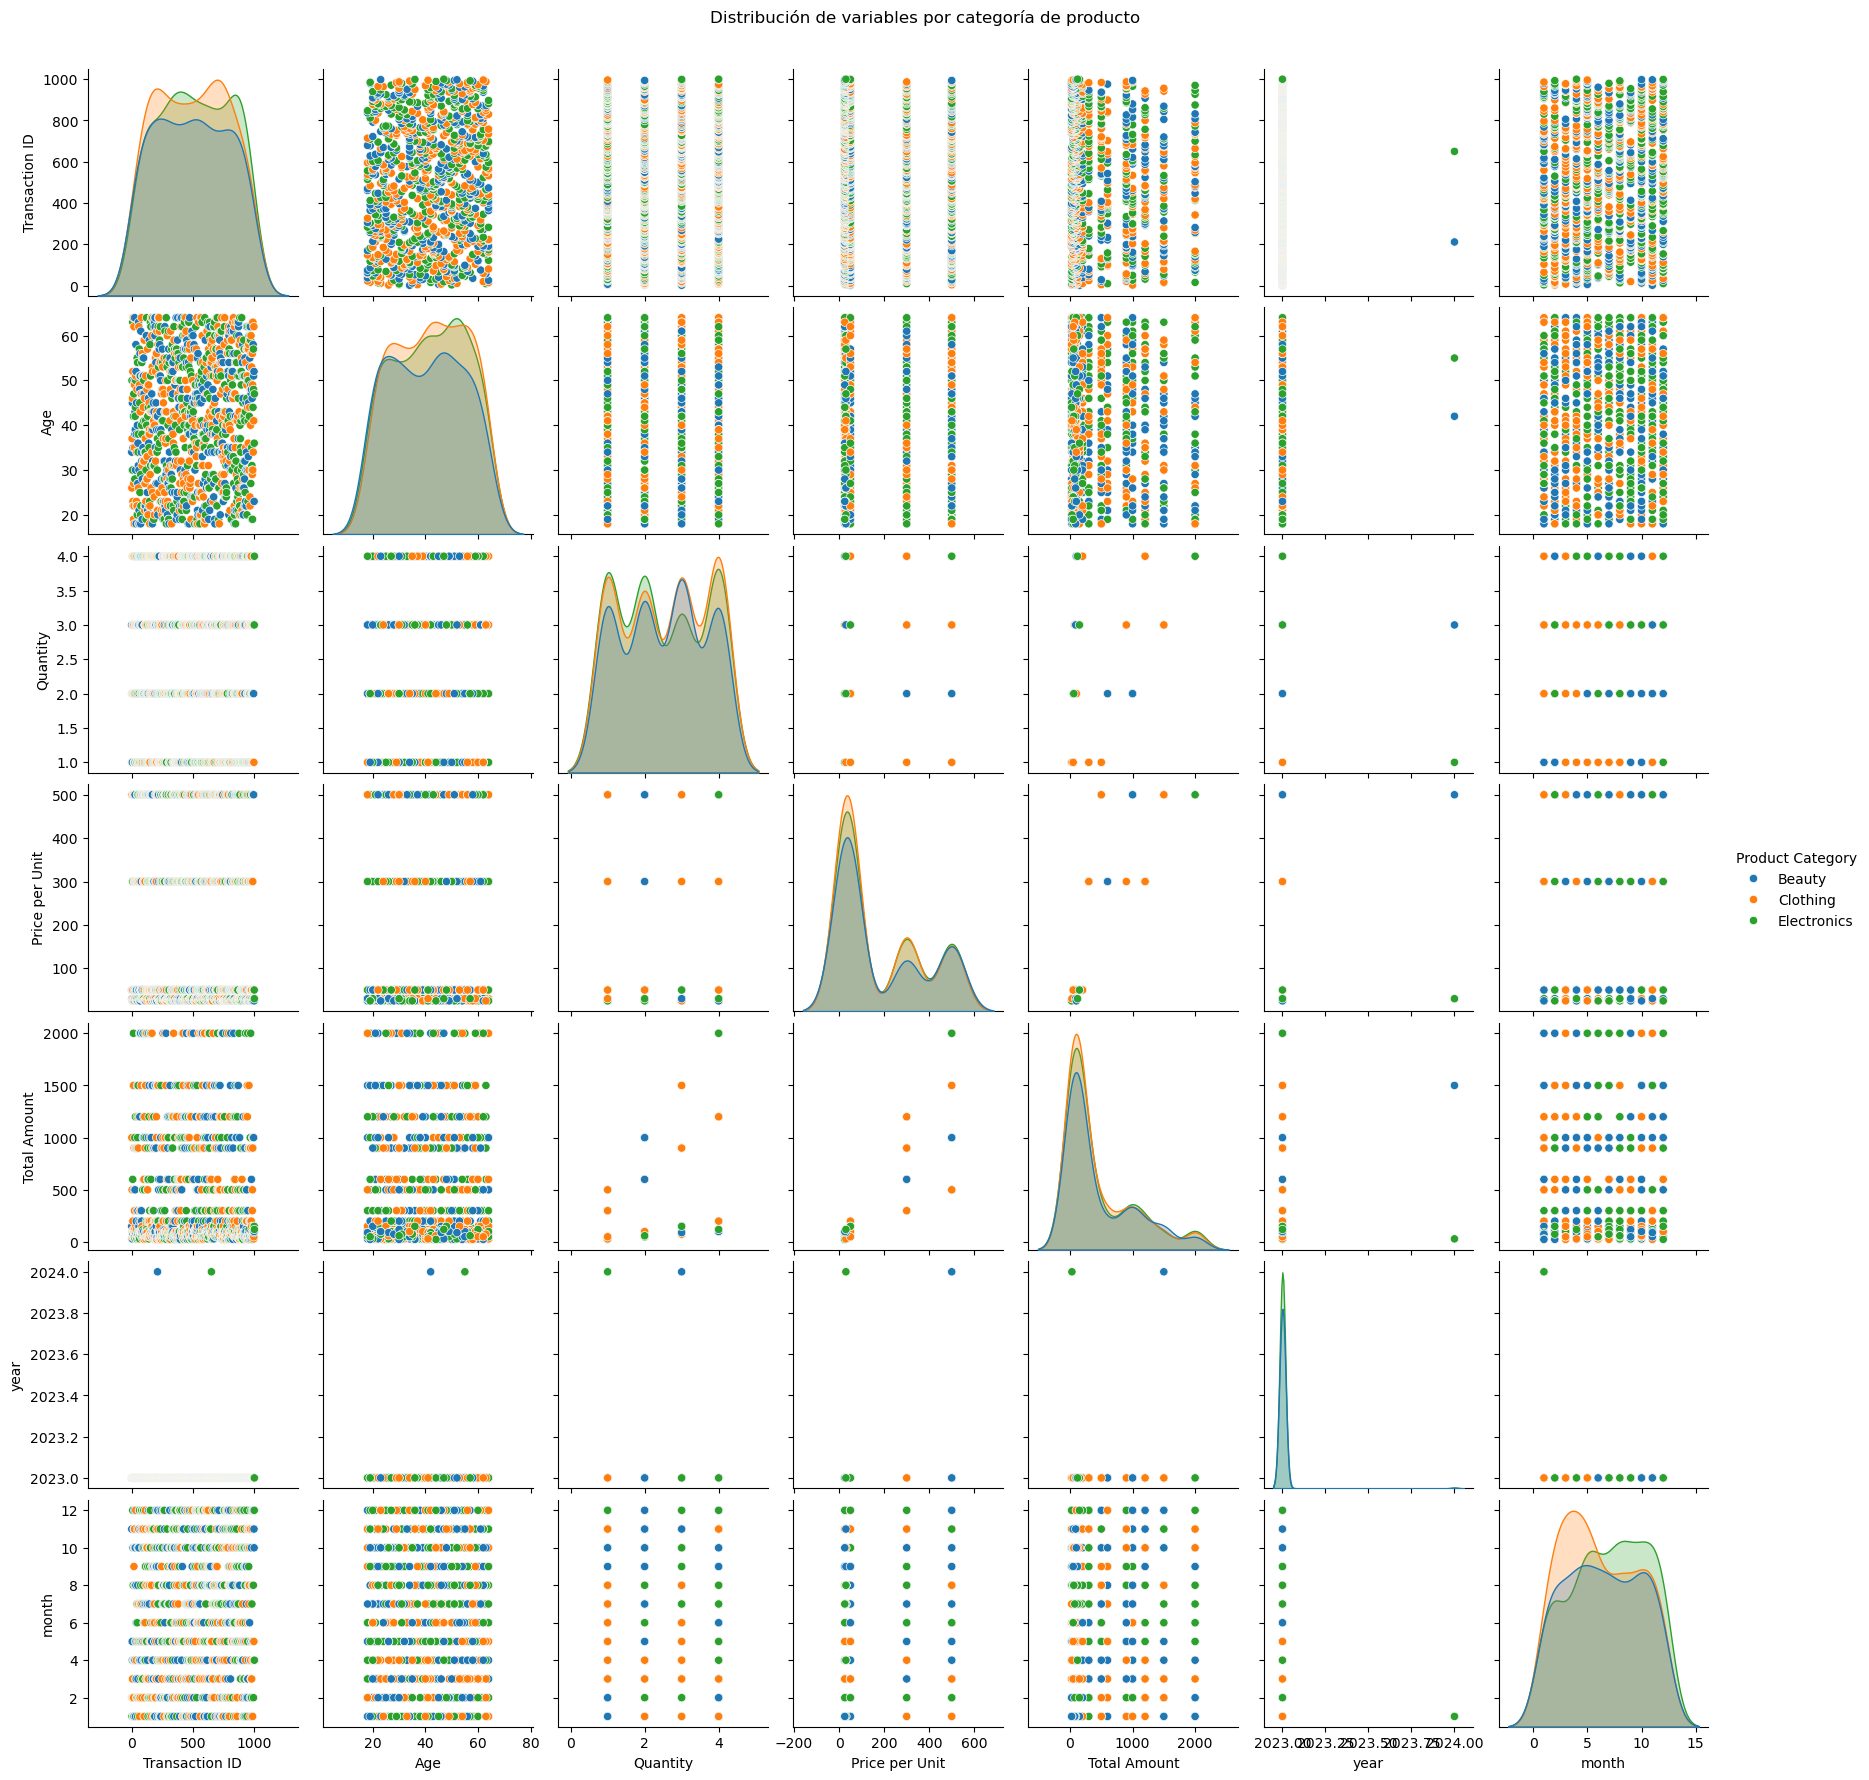

In [44]:
g1 = sns.pairplot(data=df, hue='Product Category')
g1.fig.suptitle('Distribución de variables por categoría de producto', y=1.02);

**Análisis:**

Con el gráfico anterior quería analizar la distribución de las variables por categoría de producto y con el scatter poder identificar alguna tendencia de los datos.

- Las distribuciones de la edad y la cantidad tienden a una distribución normal.

- Las distribuciones de price per unit y Total amount están sesgadas hacia la derecha lo que indica una concentración de datos hacia la izquierda de la distribución.

- Si vemos gráficos de scatter como Transaction VS Age o Age VS Cantidad se puede interpretar que no hay una sectorización de los datos que nos permita decir cosas como personas de cierta edad prefieren comprar dicha categoría, sin embargo vamos a ahondar en esto más adelante.

In [15]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Análisis de Date

In [19]:
# Agreguemos una columna para el año y otra para el mes 
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5


In [21]:
df[df['year'] == 2024]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,2024,1
649,650,2024-01-01,CUST650,Male,55,Electronics,1,30,30,2024,1


Solo hay dos datos relacionados al año 2024 por lo cual no es muy significativo hacer un análisis de ventas por año.

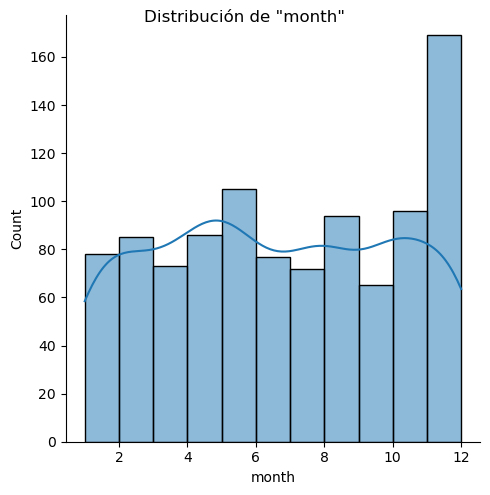

In [27]:
g2 = sns.displot(data=df,
                 x='month', 
                 kde=True)

g2.fig.suptitle('Distribución de "month".');

Vemos que la cantidad de ventas en cada mes es pareja excepto en Diciembre que es mayor que en todos los meses lo cual tiene mucho sentido.

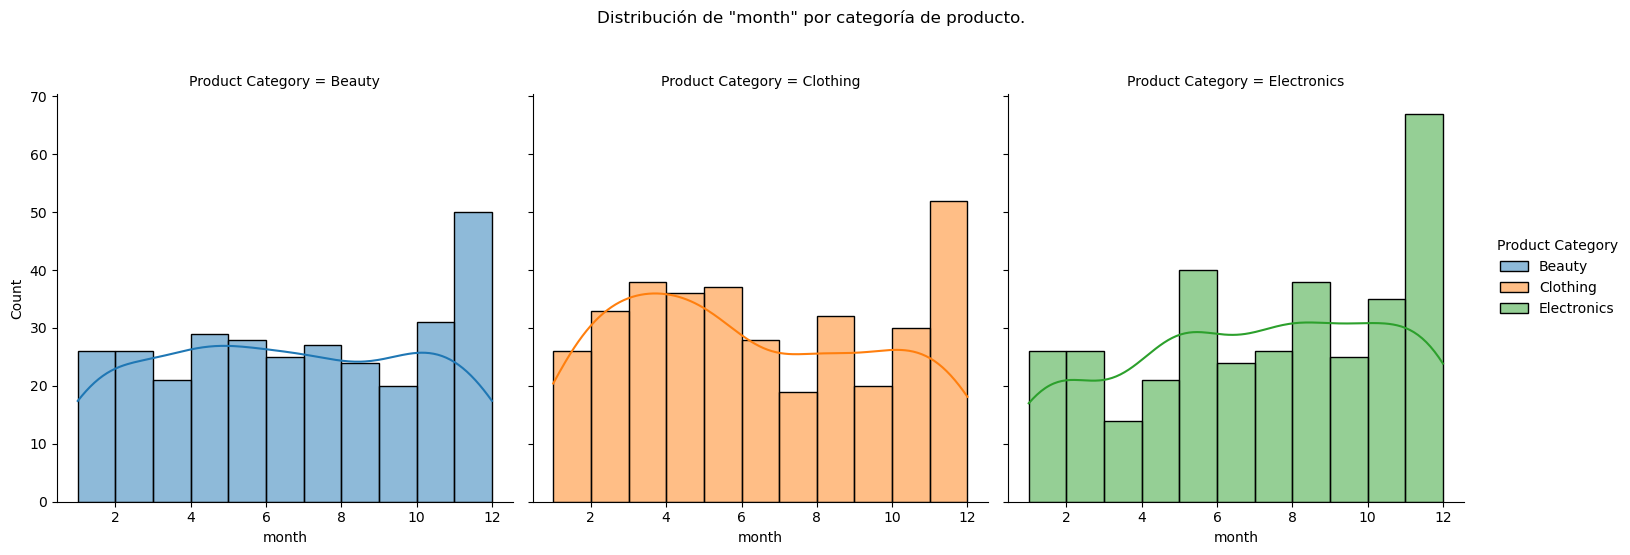

In [34]:
g3 = sns.displot(data=df,
                 x='month', 
                 kde=True,
                 hue='Product Category',
                 col='Product Category')

g3.fig.suptitle('Distribución de "month" por categoría de producto.', y=1.1);

Si analizamos la misma distribución por categoría de producto vemos que el comportamiento es similar.

### Análisis de gender.

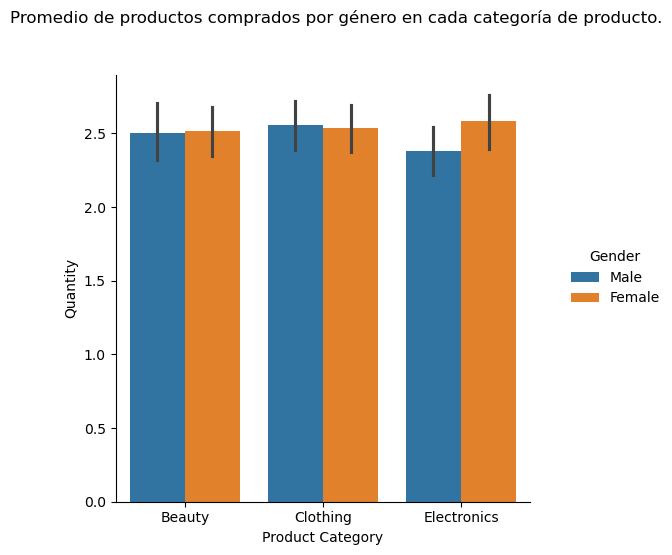

In [37]:
g4= sns.catplot(data=df,
                kind='bar',
                x='Product Category',
                y='Quantity',
                hue='Gender')

g4.fig.suptitle('Promedio de productos comprados por género en cada categoría de producto.', y=1.1);

La media de productos comprados entre hombres y mujeres no es muy diferente en cada categpría de productos.

### Análisis de prodcut category

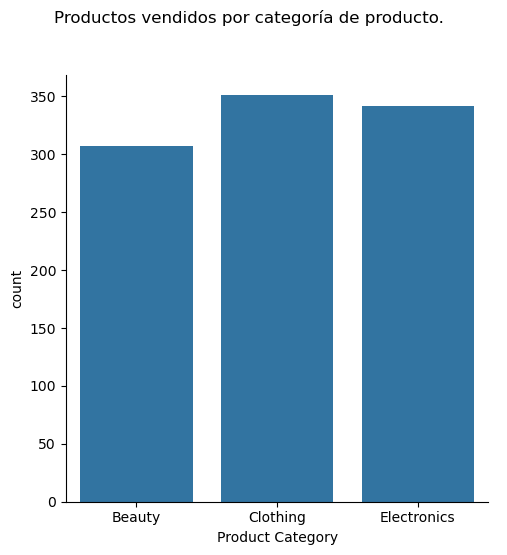

In [43]:
g5= sns.catplot(data=df,
                kind='count',
                x='Product Category')

g5.fig.suptitle('Productos vendidos por categoría de producto.', y=1.1);

No hay una diferencia significativa entre las ventas de cada categoría de producto.

**Conclusiones:**

Hasta este punto y con los análisis hechos podemos decir que el primer gráfico que se presentó esel que mejor resume la realidad delos datos. Las diferentes variables analizadas no presentan una segmentación marcada en algún punto como "los hombres compran más esto que las mujeres" o "las ventas incrementan en los últimos meses del año y en los primeros las ventasson muy bajas". Con todo esto solo se puede decir que las ventas están equilibradas en cuanto a cantidad, categoría de producto, género e incluso en el tiempo.

In [45]:
# Guardamos el df que trabajamos en este eda para usarlo en la construcción del modelo
# df.to_pickle('df_data.pkl')